0th iteration
1th iteration
2th iteration
3th iteration
4th iteration
5th iteration
6th iteration
7th iteration
8th iteration
9th iteration
10th iteration
11th iteration
12th iteration
13th iteration
14th iteration
15th iteration
16th iteration
17th iteration
18th iteration
19th iteration
20th iteration
21th iteration
22th iteration
23th iteration
24th iteration
25th iteration
26th iteration
27th iteration
28th iteration
29th iteration
30th iteration
31th iteration
32th iteration
33th iteration
34th iteration
35th iteration
36th iteration
37th iteration
38th iteration
39th iteration
40th iteration
41th iteration
42th iteration
43th iteration
44th iteration
45th iteration
46th iteration
47th iteration
48th iteration
49th iteration
50th iteration
51th iteration
52th iteration
53th iteration
54th iteration
55th iteration
56th iteration
57th iteration
58th iteration
59th iteration
60th iteration
61th iteration
62th iteration
63th iteration
64th iteration
65th iteration
66th iteration
67th 

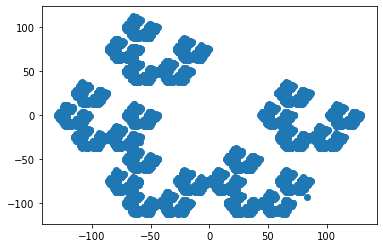

In [1]:
## Mother function (plot points)

def plot_points ():
    
    ## Doc string
    
    """
    Python function to:
    
    1. Create a regular hexagon
    2. Pick a random point, P, inside the hexagon. 
    3. Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.
    4. Compute the centroid of T. This becomes your new random point, P.  Save it, make a new random triangle as above, compute the new centroid etc… Repeat this process 10,000 times. 
    5. Make a scatter plot of all your 10,000 random points

    """
    
    ## Import necessary libraries
    
    import turtle, math
    import matplotlib.pyplot as plt
    import numpy as np
    import random
    from shapely.geometry import Polygon, Point
    
    ## Configure turtle for drawing

    myPen = turtle.Turtle()
    myPen.shape("arrow")
    myPen.pencolor("purple")
    myPen.pensize(2)
    myPen.speed(0)
    
    ## Helper fxn 1
    #A Procedure to draw a polygon from a list of vertices.
    
    def drawPolygon(polygon):
        myPen.penup()
        myPen.goto(polygon[0][0],polygon[0][1])
        myPen.pendown()
        
        for i in range(1,len(polygon)):
            myPen.goto(polygon[i][0],polygon[i][1])
            
        myPen.goto(polygon[0][0],polygon[0][1])
 
 
    #A polygon can be stored as a list of vertices 
    hexagon=[]
    R = 150
    for n in range(0,6):
        x = round(R*math.cos(math.radians(90+n*60)),2)
        y = round(R*math.sin(math.radians(90+n*60)),2)
        hexagon.append([x,y])
        
    drawPolygon(hexagon)
    
    myPen.hideturtle()
    
    ## Store hexagon as shapely geometry Points
    poly = Polygon(hexagon)
    
    ## Helper fxn 2
    ## Generate random point within hexagon

    def random_points_within(poly, num_points):
        
        min_x, min_y, max_x, max_y = poly.bounds

        points = []

        while len(points) < num_points:
            random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
            if (random_point.within(poly)):
                points.append(random_point)

        return points
    
    
    ## Get  random points within hexagon
    points = random_points_within(poly,1)

    ## Get x and y coordinates of random point

    for p in points:
        coord1,coord2 = p.x,p.y

    p = Point(coord1,coord2)

    #print(coord1,coord2)
    #print(poly.contains(p))


    ## Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.

    # using zip()
    # consecutive element pairing 
    ## create list of adjacent vertex coordinates
    adjacent_coordinates = list(zip(hexagon, hexagon[1:]))

    ## select first vertex of hexagon to be added to list generated by zip to complete coordinates loop

    first_vertex_coordinate = hexagon[0]
    last_vertex_coordinate = hexagon[-1]

    ## complete the set with last and first vertex
    adjacent_coordinates.append(tuple((last_vertex_coordinate, first_vertex_coordinate)))


    ## randomly selectvertex 0 to 5 (range) then add 1 for next vertex (adjacent vertex)

    lower_limit = 0
    upper_limit = len(adjacent_coordinates) - 2

    random_vertex1 = random.randint(lower_limit,upper_limit)
    random_vertex2 = random_vertex1 + 1

    ## Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.

    turtle.penup()
    turtle.goto(coord1,coord2)
    turtle.pendown()
    turtle.goto(hexagon[random_vertex1])

    turtle.penup()
    turtle.goto(coord1,coord2)
    turtle.pendown()
    turtle.goto(hexagon[random_vertex2])


    myPen.hideturtle()

    ##Compute the centroid of T. This becomes your new random point, P.  Save it, make a new random triangle as above, compute the new centroid etc… Repeat this process 10,000 times. 

    ## Create lists to store random point p, triangle centroids and random vertices coordinates
    x_points = []
    y_points = []

    centroid = []
    random_vertexes1 = []
    random_vertexes2 = []


    ## Append first random coordinates to list
    x_points.append(coord1)
    y_points.append(coord2)

    centroid.append((coord1,coord2))
    random_vertexes1.append(random_vertex1)
    random_vertexes2.append(random_vertex2)

    ## For loop to calculate centroid and join adjacent vertexes 10,000 times

    for i in range(10000):

        # coordinates of the vertices
        x1, x2, x3 = centroid[-1][0],hexagon[random_vertexes1[-1]][0],hexagon[random_vertexes2[-1]][0]
        y1, y2, y3 = centroid[-1][1],hexagon[random_vertexes1[-1]][1],hexagon[random_vertexes2[-1]][1]

        # Formula to calculate centroid
        x = (x1 + x2 + x3) / 3
        y = (y1 + y2 + y3) / 3

        #print("Centroid =","(",x,",",y,")")
        #centroid = [x,y]

        x_points.append(x)
        y_points.append(y)

        centroid.append((x,y))



        #print("X axis coordinates:",x_points)
        #print("Y axis coordinates:",y_points)

        ## randomly select vertices
        random_vertexa = random.randint(lower_limit,upper_limit)
        random_vertexb = random_vertexa + 1

        random_vertexes1.append(random_vertexa)
        random_vertexes2.append(random_vertexb)

        ## Draw triangles from centroid

        turtle.penup()
        turtle.goto(centroid[-1][0],centroid[-1][1])
        turtle.pendown()
        turtle.goto(hexagon[random_vertexes1[-1]])

        turtle.penup()
        turtle.goto(centroid[-1][0],centroid[-1][1])
        turtle.pendown()
        turtle.goto(hexagon[random_vertexes2[-1]])

        myPen.hideturtle()

        ## Track iterations
        print('{}th iteration'.format(i))

    plt.scatter(x_points,y_points)

## Call mother fxn
plot_points()